In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys

detanet_dir = "/content/drive/MyDrive/Colab Notebooks/DetaNet/code"

if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  import sys

  print('Running on CoLab, mounting google drive...')
  drive.mount('/content/drive')

  base_dir = "/content/drive/MyDrive/Colab Notebooks/CLAMS"
else:
  base_dir = os.getcwd()
  print('Not running on CoLab')

src_dir = os.path.join(base_dir, "src")

sys.path.append(base_dir)
sys.path.append(src_dir)
sys.path.append(detanet_dir)

Running on CoLab, mounting google drive...
Mounted at /content/drive


In [ ]:
import logging
import sys
import warnings
warnings.filterwarnings('ignore')

# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create STDERR handler
handler = logging.StreamHandler(sys.stdout)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(asctime)-15s %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Set STDERR handler as the only handler
logger.handlers = [handler]

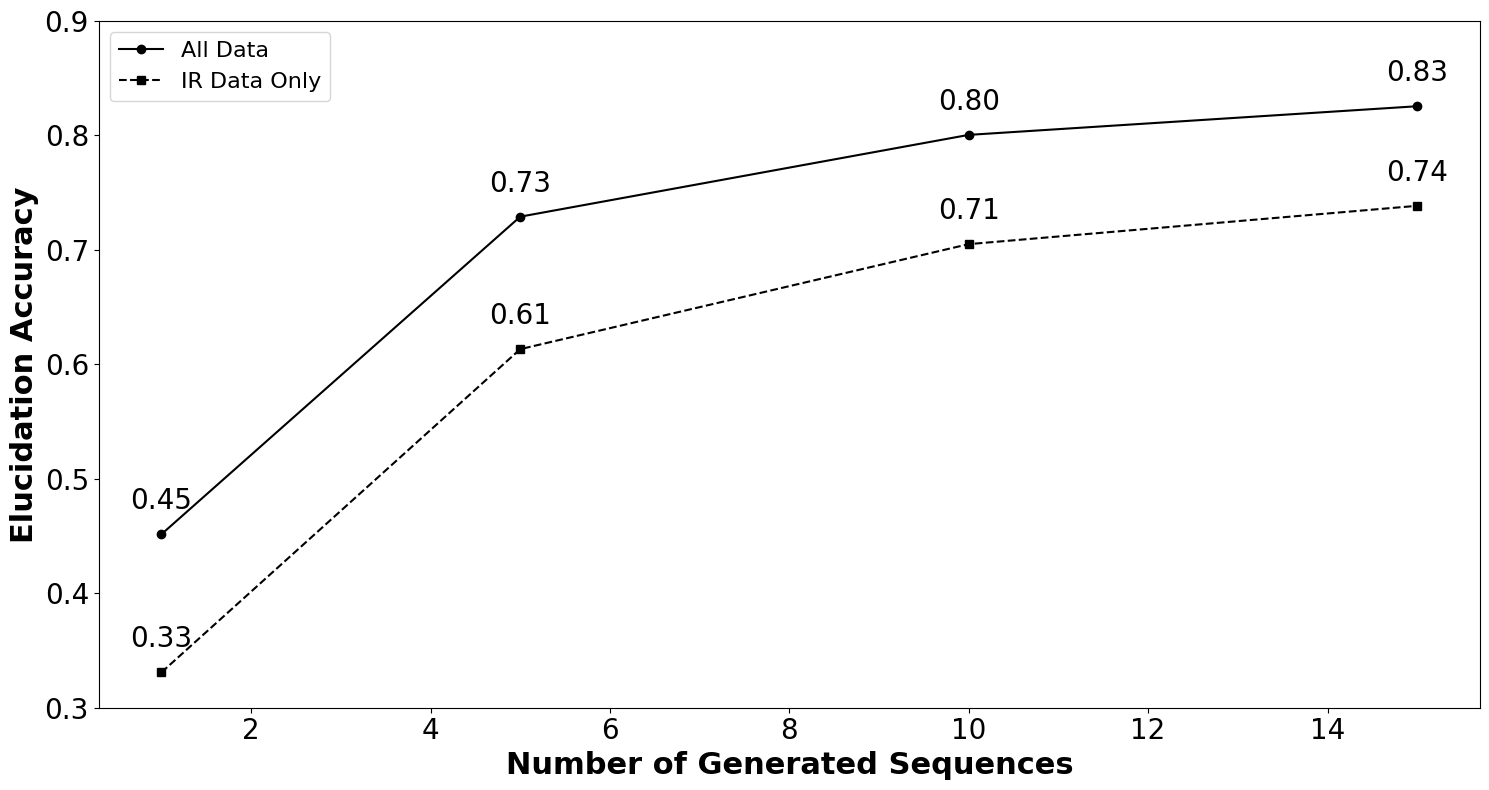

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "k": [1, 5, 10, 15],
    "acc_all": [0.45155722915195734, 0.7290342825762924, 0.8005020789205303, 0.8255275751157135],
    "acc_ir": [0.33087600972472747, 0.6132852325307819, 0.7050427417457454, 0.7385303113481295]
}

# Create DataFrame
perf_df = pd.DataFrame(data=data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting acc_all and acc_ir
ax.plot(perf_df['k'], perf_df['acc_all'], 'o-', color="k", label='All Data')
ax.plot(perf_df['k'], perf_df['acc_ir'], 's--', color="k", label='IR Data Only')

# Annotate points with accuracy values
for i in range(len(perf_df)):
    ax.annotate(f'{perf_df["acc_all"][i]:.2f}', (perf_df['k'][i], perf_df['acc_all'][i]),
                textcoords="offset points", xytext=(0,18), ha='center', fontsize=20, color="black")
    ax.annotate(f'{perf_df["acc_ir"][i]:.2f}', (perf_df['k'][i], perf_df['acc_ir'][i]),
                textcoords="offset points", xytext=(0,18), ha='center', fontsize=20, color="black")

# Setting labels
ax.set_xlabel('Number of Generated Sequences', fontsize=22, fontweight='bold')
ax.set_ylabel('Elucidation Accuracy', fontsize=22, fontweight='bold')
ax.set_ylim([0.3, 0.9])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Display legend
ax.legend(fontsize=16, loc=2)

# Set title (optional)
# ax.set_title('Accuracy as a function of k', fontsize=22)

# Show plot
plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'figs', 'Fig.3.png'), dpi=300)
plt.show()


In [ ]:
import os
import pandas as pd


vit_test_all_dir = "models/vit_models/run7"
vit_test_ir_dir = "models/vit_models/run8"

vit_test_all = pd.read_hdf(os.path.join(base_dir, vit_test_all_dir, "vit_test_results.h5"))
ic_test_all = pd.read_hdf(os.path.join(base_dir, vit_test_all_dir, "success_ratio.h5")).set_index("Group")
test_all = vit_test_all.merge(ic_test_all, left_index=True, right_index=True)

vit_test_ir = pd.read_hdf(os.path.join(base_dir, vit_test_ir_dir, "vit_test_results.h5"))
ic_test_ir = pd.read_hdf(os.path.join(base_dir, vit_test_ir_dir, "success_ratio.h5")).set_index("Group")
test_ir = vit_test_ir.merge(ic_test_ir, left_index=True, right_index=True)

2024-06-18 00:57:40,839 numexpr.utils - INFO - NumExpr defaulting to 2 threads.


In [ ]:
test_all

,precision,recall,f1-score,support,Score
alkane,0.993095,0.995526,0.994309,11846.0,0.823147
alkene,0.979755,0.976758,0.978254,1635.0,0.817125
alkyne,0.981595,0.982198,0.981896,1629.0,0.910374
arene,0.961538,0.925926,0.943396,27.0,0.962963
haloalkane,0.942529,0.755760,0.838875,217.0,0.797235
alcohol,0.995147,0.993459,0.994302,4128.0,0.833333
aldehyde,0.993956,0.997305,0.995627,1484.0,0.869272
ketone,0.970290,0.933752,0.951670,1434.0,0.850767
ester,0.909091,0.926829,0.917874,410.0,0.897561
ether,0.960857,0.970657,0.965732,5589.0,0.822330


In [ ]:
test_ir

,precision,recall,f1-score,support,Score
alkane,0.997888,0.997299,0.997593,11846.0,0.738055
alkene,0.978084,0.955352,0.966584,1635.0,0.740061
alkyne,0.994431,0.986495,0.990447,1629.0,0.735421
arene,1.000000,1.000000,1.000000,27.0,0.888889
haloalkane,0.941748,0.894009,0.917258,217.0,0.737327
alcohol,0.997340,0.999273,0.998306,4128.0,0.734981
aldehyde,0.990560,0.989892,0.990226,1484.0,0.729784
ketone,0.973069,0.957462,0.965202,1434.0,0.724547
ester,0.923611,0.973171,0.947743,410.0,0.756098
ether,0.962597,0.976203,0.969352,5589.0,0.739488


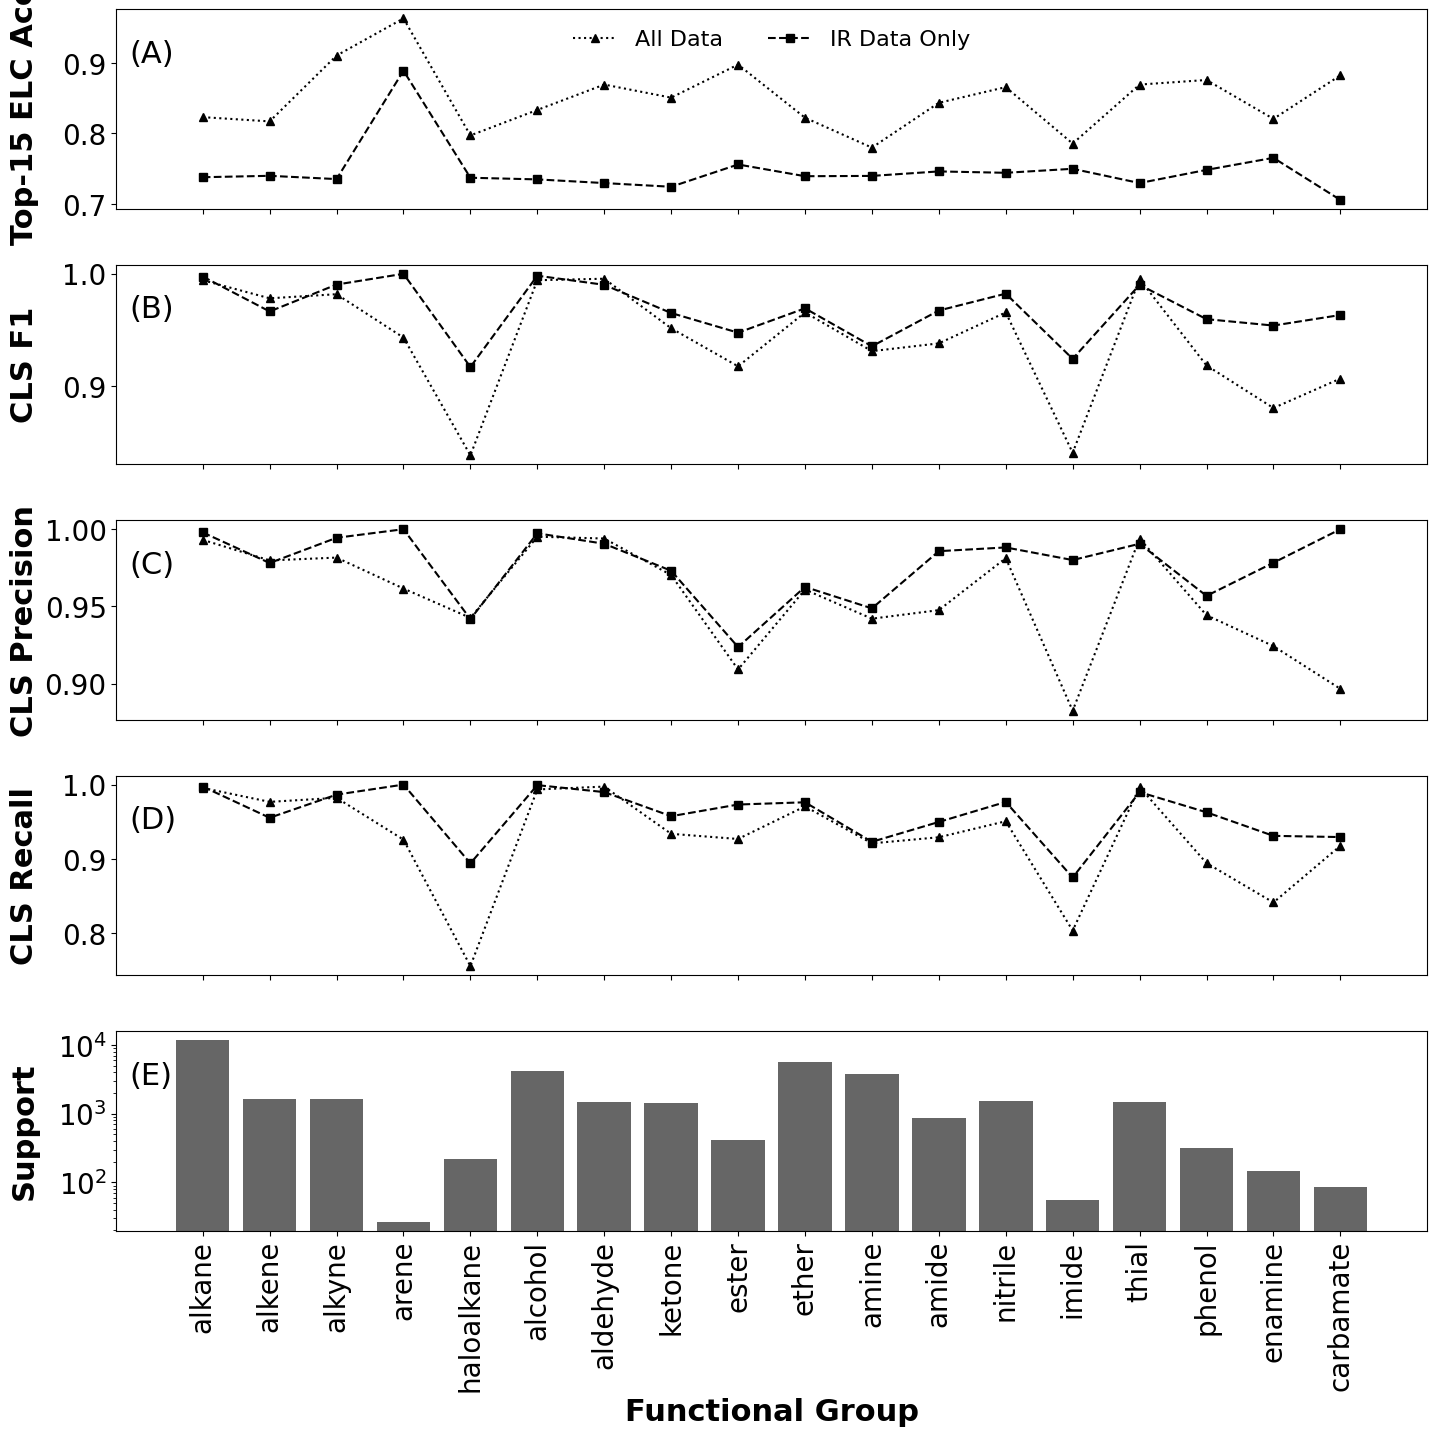

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

# Labels for the subplots
metrics = {
    'Score': 'Top-15 ELC Acc.',
    'f1-score': 'CLS F1',
    'precision': 'CLS Precision',
    'recall': 'CLS Recall',
    'support': 'Support'
}

letters = ['(A)', '(B)', '(C)', '(D)', '(E)']
styles = ['^:', 's--']

for i, (ax, metric, letter) in enumerate(zip(axs[:-1], metrics, letters[:-1])):
    ax.plot(test_all.index, test_all[metric], styles[0], color='k', label='All Data')
    ax.plot(test_ir.index, test_ir[metric], styles[1], color='k', label='IR Data Only')
    ax.set_ylabel(metrics[metric], fontsize=22, fontweight='bold')
    ax.text(0.01, 0.85, letter, transform=ax.transAxes, fontsize=22, va='top', ha='left')
    ax.tick_params(axis='y', labelsize=20)

# Last subplot for support as bar plot
axs[-1].bar(test_all.index, test_all['support'], label='Support', color='k', alpha=0.6)
axs[-1].set_ylabel(metrics['support'], fontsize=22, fontweight='bold')
axs[-1].set_yscale('log')
axs[-1].text(0.01, 0.85, letters[-1], transform=axs[-1].transAxes, fontsize=22, va='top', ha='left')
axs[-1].tick_params(axis='y', labelsize=20)

# Customize the x-axis only for the bottom subplot
axs[-1].set_xlabel('Functional Group', fontsize=22, fontweight='bold')
axs[-1].tick_params(axis='x', labelsize=20)
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=90)

# Display legend in the top subplot
axs[0].legend(fontsize=16, loc='upper center', frameon=False, ncol=2)

# Align the y-axis labels
fig.align_ylabels(axs)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.savefig(os.path.join(base_dir, 'figs', 'Fig.2.png'), dpi=300)
plt.show()
